In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Final W is :  [[-1.  -3.3  8.1]]
Count is :  5
W0 is -1.00
W1 is -3.30
W2 is 8.10 !
 


Text(0,0.5,'col2')

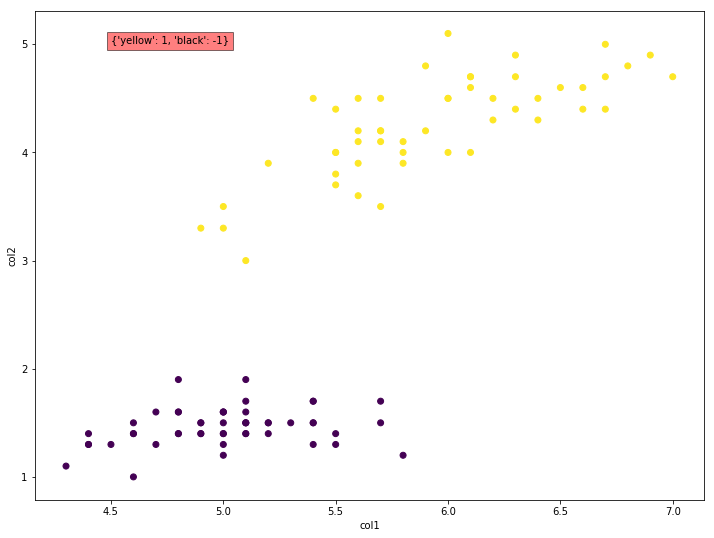

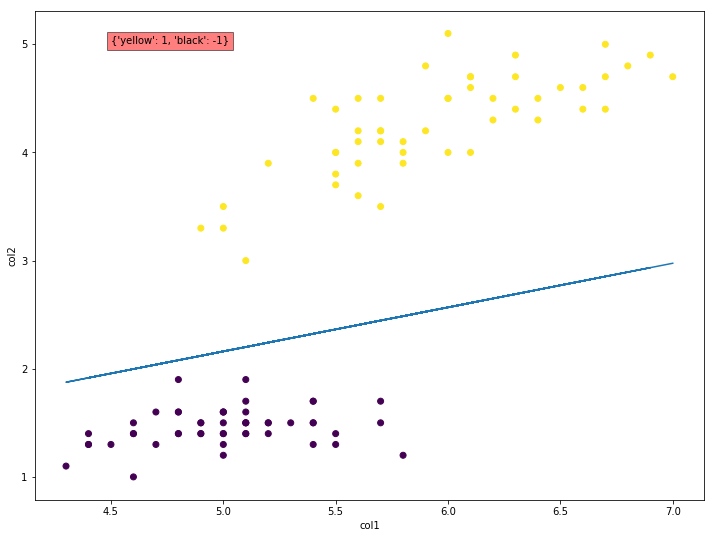

In [20]:
data1 = pd.read_csv('data1.csv',header=None)
data1.columns = ['col1','col2','labels']

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.scatter(data1['col1'],data1['col2'],c=np.array(data1['labels']))
ax1.text(4.5,5,s={'yellow':1,'black':-1},bbox=dict(facecolor='red', alpha=0.5))
ax1.set_xlabel('col1')
ax1.set_ylabel('col2')

data = pd.concat([data1.iloc[:,:2],pd.DataFrame(np.ones((len(data1),1)))],axis=1)
data.columns = ['col1','col2','col0']
data = data[['col0','col1','col2']]

def my_pla():
    m,n = data.shape
    W = np.ones((n,1))
    W = np.transpose(W)
    
    count = 0
    while True:
        count +=1
        iscompleted = True
        for i in range(m):
            X = data.iloc[i,0:3]
            Y = np.dot(W,X)
            if np.sign(Y) == np.sign(data1.iloc[i,-1]):
                continue
            else:
                iscompleted = False
                W = W + (data1.iloc[i,-1])*np.array(X)
        if iscompleted:
            break
    
    print("Final W is : ",W)
    print("Count is : ",count)
    return W


W = my_pla()
W0 = W[0][0]
W1 = W[0][1]
W2 = W[0][2]
print("W0 is %.2f\nW1 is %.2f\nW2 is %.2f !\n "%(W0,W1,W2))
Y1 = -W0/W2-(W1/W2)*data['col1']
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
#ax1.scatter(data1['col1'],data1['col2'],np.array(data1['labels']),np.array(data1['labels']))
ax1.scatter(data1['col1'],data1['col2'],c=np.array(data1['labels']))
ax1.text(4.5,5,s={'yellow':1,'black':-1},bbox=dict(facecolor='red', alpha=0.5))
ax1.plot(data['col1'],Y1)
ax1.set_xlabel('col1')
ax1.set_ylabel('col2')


 ---> XXX <---  ---> XXX <---  ---> XXX <---  ---> XXX <---  ---> XXX <--- 
Pocket learning algorithm is over!
Classification accuracy : 16.00%
W : 
 [[-1813.5  ]
 [-3327.42 ]
 [ 4915.445]]
W0 is -1813.500000000058,W1 is -3327.4199999998937,W2 is 4915.445000000585 ! 


Text(0,0.5,'col2')

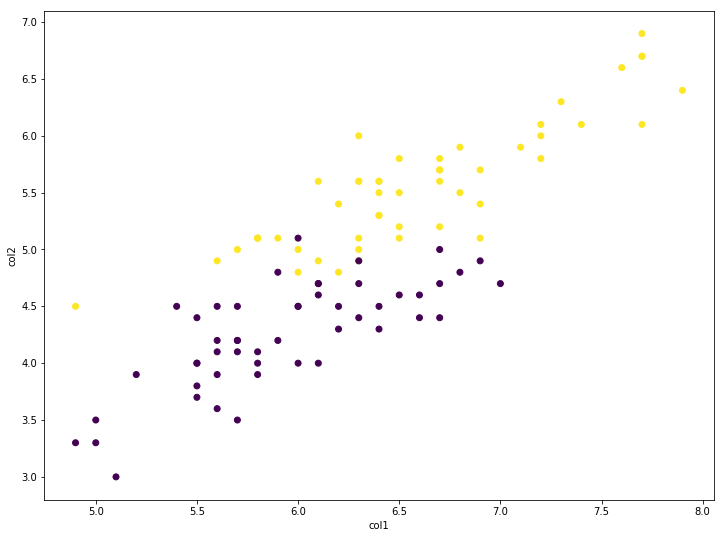

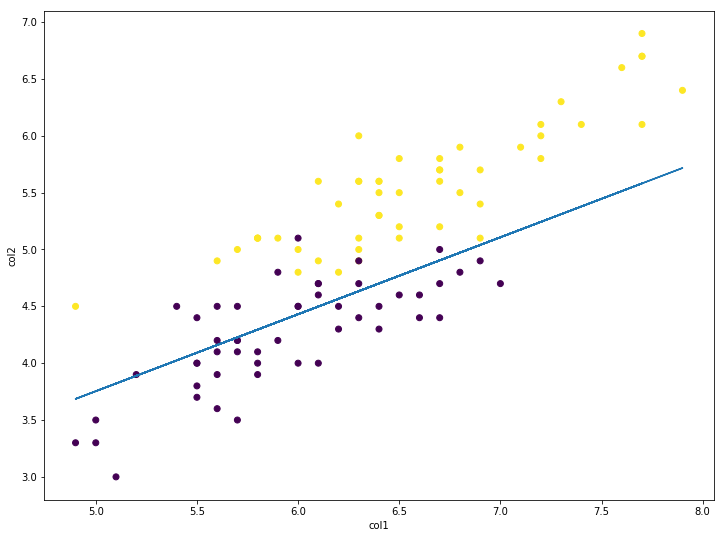

In [7]:
print(" ---> XXX <--- "*5)

data2 = pd.read_csv('data2.csv',header=None)
data2.columns = ['col1','col2','labels']
data2.describe()

data3 = pd.concat([pd.DataFrame(np.ones((len(data2),1))),data2.iloc[:,0:2]],axis=1)
data3.columns = ['col0','col1','col2']
data3.describe()

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.scatter(data2.iloc[:,0],data2.iloc[:,1],c=np.array(data2.iloc[:,2]))
ax1.set_xlabel('col1')
ax1.set_ylabel('col2')

max_iter = 6000
iteration = 1
alpha = 0.95
m,n = data2.shape
W = np.ones((n,1))
temp = np.dot(data3.iloc[:,:],W)
temp1 = np.squeeze(temp)
f = temp1 * np.array(data2.iloc[:,-1])
idx = np.where(f <= 0)
labels = data2.iloc[:,-1]

while iteration <= max_iter:
    if f[idx].size == 0:
        break
    for sample in np.array(data3.iloc[idx]):
        i = 0
        delter_W = alpha * sample * labels[idx[0][i]]
        delter_W_add = np.expand_dims(delter_W,1)
        W += delter_W_add
        i +=1
    temp = np.dot(data3.iloc[:,:],W)
    temp1 = np.squeeze(temp)
    f = temp1 * np.array(data2.iloc[:,-1])
    idx = np.where(f <= 0) 
    iteration +=1
if f[idx].size == 0:
    accuracy = 100
else:
    accuracy = len(f[idx]) / m * 100
print("Pocket learning algorithm is over!")
print("Classification accuracy : %.2f%%" % accuracy)

print("W : \n",W)
W0 = W[0][0]
W1 = W[1][0]
W2 = W[2][0]
print("W0 is %s,W1 is %s,W2 is %s ! "%(W0,W1,W2))
Y1 = -W0/W2-(W1/W2)*data3['col1']
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.scatter(data2['col1'],data2['col2'],c=np.array(data2['labels']))
ax1.plot(data3['col1'],Y1)
ax1.set_xlabel('col1')
ax1.set_ylabel('col2')